In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [9]:
df=pd.read_csv('heart failure.csv')

In [13]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [12]:
df.shape

(299, 13)

In [14]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [16]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [15]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [18]:
df.DEATH_EVENT.value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

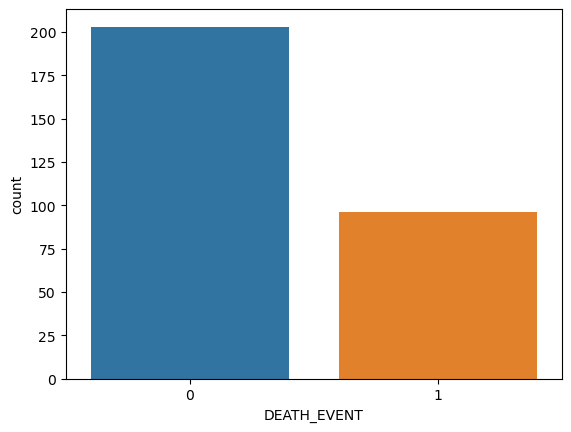

In [24]:
sns.countplot(x='DEATH_EVENT',data=df)

In [25]:
df.high_blood_pressure.value_counts()

high_blood_pressure
0    194
1    105
Name: count, dtype: int64

<Axes: xlabel='high_blood_pressure', ylabel='count'>

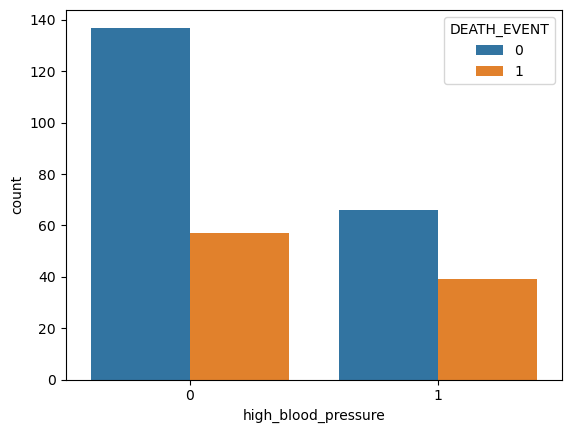

In [26]:
sns.countplot(x='high_blood_pressure',data=df,hue='DEATH_EVENT')

<Axes: xlabel='count', ylabel='high_blood_pressure'>

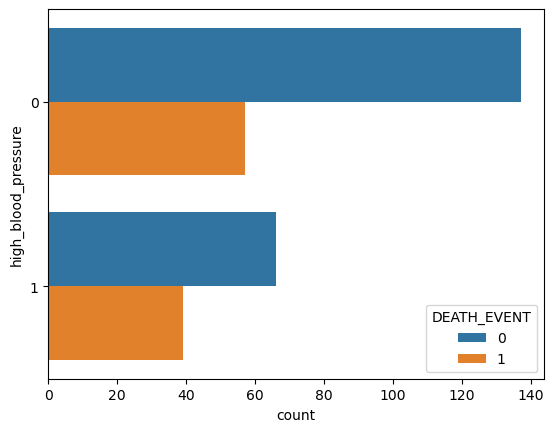

In [27]:
sns.countplot(y='high_blood_pressure',data=df,hue='DEATH_EVENT')

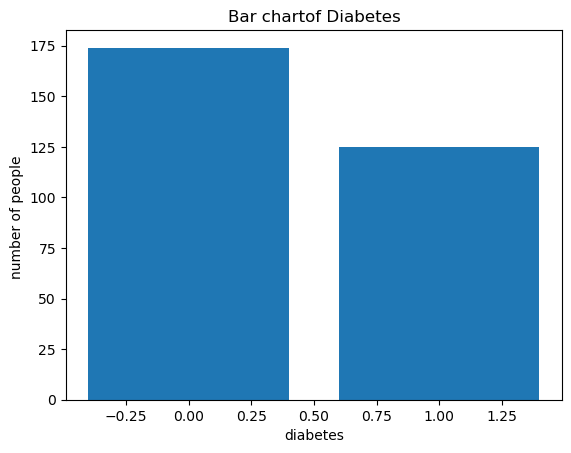

In [30]:
#create a bar chart of the number of customers for each country orgin
plt.bar(df['diabetes'].value_counts().index,df['diabetes'].value_counts().values)
plt.xlabel('diabetes')
plt.ylabel('number of people ')
plt.title('Bar chartof Diabetes')
plt.show()

In [33]:
diabetes_status=df['diabetes'].value_counts()
transactions=diabetes_status.index
quantity=diabetes_status.values
figure=px.pie(df,
             values=quantity,
             names=transactions,hole=.60,
             title='Diabetes status')
figure.show()

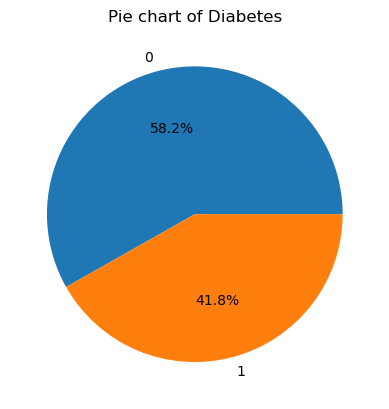

In [34]:
#get pie chart slice labels
pie_chart_slice_labels=df['diabetes'].value_counts().index.to_numpy()
#get pie chart slice values
pie_chart_slice_values=df['diabetes'].value_counts().to_numpy()
#create a pie cahrt of the number of customers for each contry origin
plt.pie(pie_chart_slice_values,labels=pie_chart_slice_labels,autopct='%1.1f%%')
plt.title('Pie chart of Diabetes')
plt.show()

# train test separet

In [61]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df.drop('DEATH_EVENT',axis=1),df[['DEATH_EVENT']],random_state=1,train_size=.70
                                          )

In [62]:
xtrain.shape

(209, 12)

In [63]:
xtrain.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12
210,70.0,0,212,1,17,1,389000.0,1.0,136,1,1,188
236,75.0,0,119,0,50,1,248000.0,1.1,148,1,0,209
44,60.0,1,588,1,60,0,194000.0,1.1,142,0,0,33
163,50.0,1,2334,1,35,0,75000.0,0.9,142,0,0,126


In [64]:
xtest.shape

(90, 12)

In [65]:
ytest.shape

(90, 1)

In [66]:
ytest.head(3)

,DEATH_EVENT
173,0
287,0
51,1


In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dt=DecisionTreeClassifier()

In [69]:
dt

DecisionTreeClassifier()

In [72]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [73]:
#prediction 
pred=dt.predict(xtrain)

In [75]:
pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [77]:
import numpy as np
np.array(ytrain['DEATH_EVENT'])

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [79]:
ytrain['predicted_Event']=pred

In [81]:
ytrain.head()

,DEATH_EVENT,predicted_Event
14,0,0
210,0,0
236,0,0
44,1,1
163,1,1


In [88]:
ytrain.tail(10)

,DEATH_EVENT,predicted_Event
237,0,0
71,0,0
129,0,0
144,1,1
133,0,0
203,0,0
255,0,0
72,1,1
235,0,0
37,1,1


# training score

In [90]:
dt.score(xtrain,ytrain['DEATH_EVENT'])

1.0

# testing result

In [92]:
xtest.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
173,50.0,1,115,0,20,0,189000.0,0.8,139,1,0,146
287,45.0,0,582,1,55,0,543000.0,1.0,132,0,0,250
51,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43
146,52.0,0,132,0,30,0,218000.0,0.7,136,1,1,112
214,65.0,1,135,0,35,1,290000.0,0.8,134,1,0,194


In [94]:
pred2=dt.predict(xtest) #new data

pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [95]:
dt.score(xtest,ytest) #accuracy


0.8111111111111111

In [96]:
 #ytest['pred2']=pred
ytest.head()

,DEATH_EVENT
173,0
287,0
51,1
146,0
214,0


# confution matrics

In [100]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,RocCurveDisplay

In [101]:
ytest.head()

,DEATH_EVENT
173,0
287,0
51,1
146,0
214,0


In [102]:
xtest.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
173,50.0,1,115,0,20,0,189000.0,0.8,139,1,0,146
287,45.0,0,582,1,55,0,543000.0,1.0,132,0,0,250
51,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43
146,52.0,0,132,0,30,0,218000.0,0.7,136,1,1,112
214,65.0,1,135,0,35,1,290000.0,0.8,134,1,0,194


In [104]:
pred_test_data=dt.predict( xtest) #  predicted result


In [105]:
pred_test_data

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [106]:
dt.score(xtest,ytest)

0.8111111111111111

In [107]:
accuracy_score(ytest,dt.predict(xtest))  # actual y and prdicted y


0.8111111111111111

In [108]:
confusion_matrix(ytest, pred_test_data)

array([[57,  7],
       [10, 16]], dtype=int64)

In [109]:
cm=confusion_matrix(ytest,dt.predict(xtest))
cm

array([[57,  7],
       [10, 16]], dtype=int64)

<Axes: >

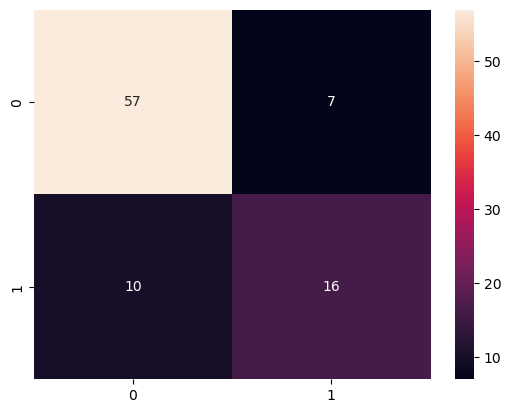

In [110]:
sns.heatmap(cm,annot=True)

In [111]:
precision_score(ytest,dt.predict(xtest))

0.6956521739130435

In [112]:
f1_score(ytest,dt.predict(xtest))

0.6530612244897959

In [114]:
print(classification_report(ytest,dt.predict(xtest)))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        64
           1       0.70      0.62      0.65        26

    accuracy                           0.81        90
   macro avg       0.77      0.75      0.76        90
weighted avg       0.81      0.81      0.81        90



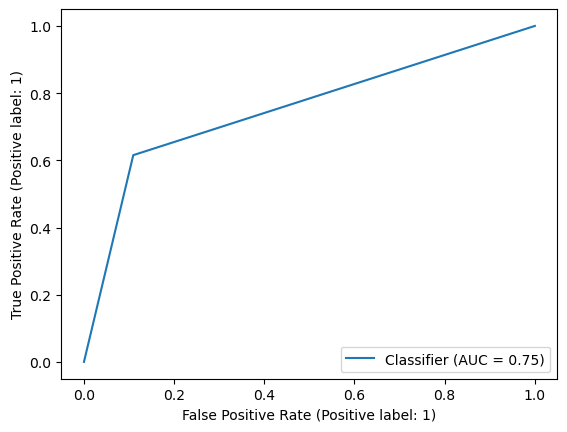

In [124]:
RocCurveDisplay.from_predictions(ytest,dt.predict(xtest))
plt.show()

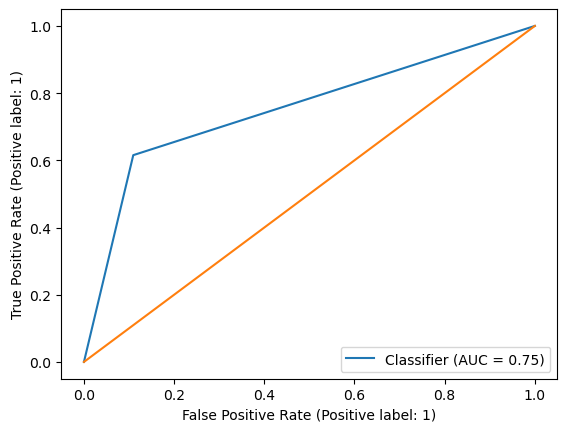

In [125]:
RocCurveDisplay.from_predictions(ytest,dt.predict(xtest))
plt.plot([0,1],[0,1])
plt.show()